In [44]:
import pandas as pd

In [46]:
df = pd.read_csv('cancer_reg.csv', encoding='ISO-8859-1')
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [48]:
df_new = df.copy()

In [49]:
drop_cols = ['TARGET_deathRate', 'PctSomeCol18_24','PctPrivateCoverageAlone','PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace']

cat_cols = ['binnedInc', 'Geography']
target_col = 'TARGET_deathRate'

In [50]:
import pandas as pd

# Assuming 'df' is your DataFrame
columns_to_fill = ['PctSomeCol18_24','PctPrivateCoverageAlone','PctEmployed16_Over']  # Replace with your actual column names

# Fill null values with the mean for each specified column
for column in columns_to_fill:
    mean_value = df_new[column].mean()
    df_new[column].fillna(mean_value, inplace=True)

# Now 'df' has null values in the specified columns filled with the mean


In [51]:
import numpy as np
y = df_new[target_col]
x = df_new.drop(drop_cols+cat_cols, axis=1)

In [52]:
import statsmodels.api as sm
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     128.0
Date:                Mon, 29 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:59:57   Log-Likelihood:                -13349.
No. Observations:                3047   AIC:                         2.675e+04
Df Residuals:                    3021   BIC:                         2.691e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    134

In [53]:
cols = model.pvalues[(model.pvalues<0.0001) & (model.pvalues.index!='const')]

## Model 2

* Features having pvalues < 0.05

In [54]:
df_new = df.copy()

In [55]:
df['binnedInc'].unique()
income_mapping = {
    '[22640, 34218.1]':0,
    '(34218.1, 37413.8]':1,
    '(37413.8, 40362.7]':2,
    '(40362.7, 42724.4]':3,
    '(42724.4, 45201]':4,
    '(45201, 48021.6]':5,
    '(48021.6, 51046.4]':6,
    '(51046.4, 54545.6]':7,
    '(54545.6, 61494.5]':8,
    '(61494.5, 125635]':9
}
df_new['binnedInc'] = df_new['binnedInc'].replace(income_mapping)

In [56]:
feature_cols = list(cols.index)
cat_cols = ['Geography']
target_col = 'TARGET_deathRate'

In [57]:
df.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'Geography',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

In [58]:
# feature_cols = [
#  'incidenceRate','PctHS25_Over','PctBachDeg25_Over'
#  ]

feature_cols = ['incidenceRate',
'PctHS25_Over',
'PctBachDeg25_Over',
'PctPublicCoverageAlone'                
    ]

In [59]:
import pandas as pd

# Assuming 'df' is your DataFrame
columns_to_fill = ['PctSomeCol18_24','PctPrivateCoverageAlone','PctEmployed16_Over']  # Replace with your actual column names

# Fill null values with the mean for each specified column
for column in columns_to_fill:
    mean_value = df_new[column].mean()
    df_new[column].fillna(mean_value, inplace=True)

# Now 'df' has null values in the specified columns filled with the mean


In [60]:
y = df_new[target_col]
x = df_new[feature_cols]

In [61]:
import statsmodels.api as sm
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     648.1
Date:                Mon, 29 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:59:59   Log-Likelihood:                -13510.
No. Observations:                3047   AIC:                         2.703e+04
Df Residuals:                    3042   BIC:                         2.706e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     63

Checking for multicollinearity

In [62]:
_, s, _ = np.linalg.svd(x)
condition_number = max(s) / min(s)
print("Condition Number:", condition_number)

#A rule of thumb is that a condition number above 30 may indicate multicollinearity.

Condition Number: 6905.451979379025


Data has multicollinearity problem

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'x' is your DataFrame of independent variables
vif_data = pd.DataFrame()
vif_data["Variable"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

high_vif_variables = vif_data[vif_data["VIF"] > 10]["Variable"]
print("High VIF Variables:", high_vif_variables)


High VIF Variables: 0    const
Name: Variable, dtype: object


In [64]:
vif_data

,Variable,VIF
0,const,231.745761
1,incidenceRate,1.025568
2,PctHS25_Over,2.464977
3,PctBachDeg25_Over,3.504137
4,PctPublicCoverageAlone,1.724822


In [65]:
feature_cols = list(vif_data[vif_data['VIF']<2]['Variable'].unique())

In [66]:
feature_cols

['incidenceRate', 'PctPublicCoverageAlone']

In [67]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)  # Adjust alpha as needed
model = ridge_model.fit(x, y)
print(model)

Ridge()


In [68]:
from sklearn.decomposition import PCA

pca = PCA()
x_pca = pca.fit_transform(x)


In [69]:
import pandas as pd

# Assuming ols_project is your DataFrame
# Replace 'YourDataFrame' with the actual DataFrame name if it's different

df_new[['County/City', 'State']] = df_new['Geography'].str.split(',', expand=True)

# Drop the original 'Geography' column if needed
# ols_project = ols_project.drop('Geography', axis=1)

# Display the modified DataFrame
print(df_new)


      avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
0     1397.000000               469             164.9     489.800000   
1      173.000000                70             161.3     411.600000   
2      102.000000                50             174.7     349.700000   
3      427.000000               202             194.8     430.400000   
4       57.000000                26             144.4     350.100000   
...           ...               ...               ...            ...   
3042  1962.667684                15             149.6     453.549422   
3043  1962.667684                43             150.1     453.549422   
3044  1962.667684                46             153.9     453.549422   
3045  1962.667684                52             175.0     453.549422   
3046  1962.667684                48             213.6     453.549422   

      medIncome  popEst2015  povertyPercent  studyPerCap  binnedInc  \
0         61898      260131            11.2   499.748204        

In [70]:
import pandas as pd
import seaborn as sns
from scipy.stats import shapiro

# Assuming your DataFrame is named ols_project
# Replace 'YourDataFrame' with the actual DataFrame name if it's different

# Extracting columns for the Shapiro-Wilk test (excluding columns 9, 34, and 35)
columns_to_exclude = ["Column9", "Column34", "Column35"]  # Adjust these column names as needed
columns_for_test = ols_project.columns.difference(columns_to_exclude)

# Create a DataFrame to store the results
shapiro_results = pd.DataFrame(columns=["Column", "W-statistic", "P-value"])

# Perform the Shapiro-Wilk test for each column
for column in columns_for_test:
    stat, p_value = shapiro(ols_project[column])
    shapiro_results = shapiro_results.append({"Column": column, "W-statistic": stat, "P-value": p_value}, ignore_index=True)

# Display the results
print(shapiro_results)




# Assuming ols_project is your DataFrame
# Replace 'YourDataFrame' with the actual DataFrame name if it's different

# Quick way to plot distributions
sns.histplot(data=df, kde=True)
plt.show()

# Create a DataFrame with column names and p-values from the Shapiro normality test
columns_to_exclude = ["Column9", "Column34", "Column35"]  # Adjust these column names as needed

shapiro_results = pd.DataFrame(columns=["Column", "P"])

for column in df_new.columns.difference(columns_to_exclude):
    p_value = shapiro(df_new[column]).pvalue
    shapiro_results = shapiro_results.append({"Column": column, "P": p_value}, ignore_index=True)

# Display the DataFrame with p-values
print(shapiro_results)


NameError: name 'ols_project' is not defined

AttributeError: 'GrouperView' object has no attribute 'join'

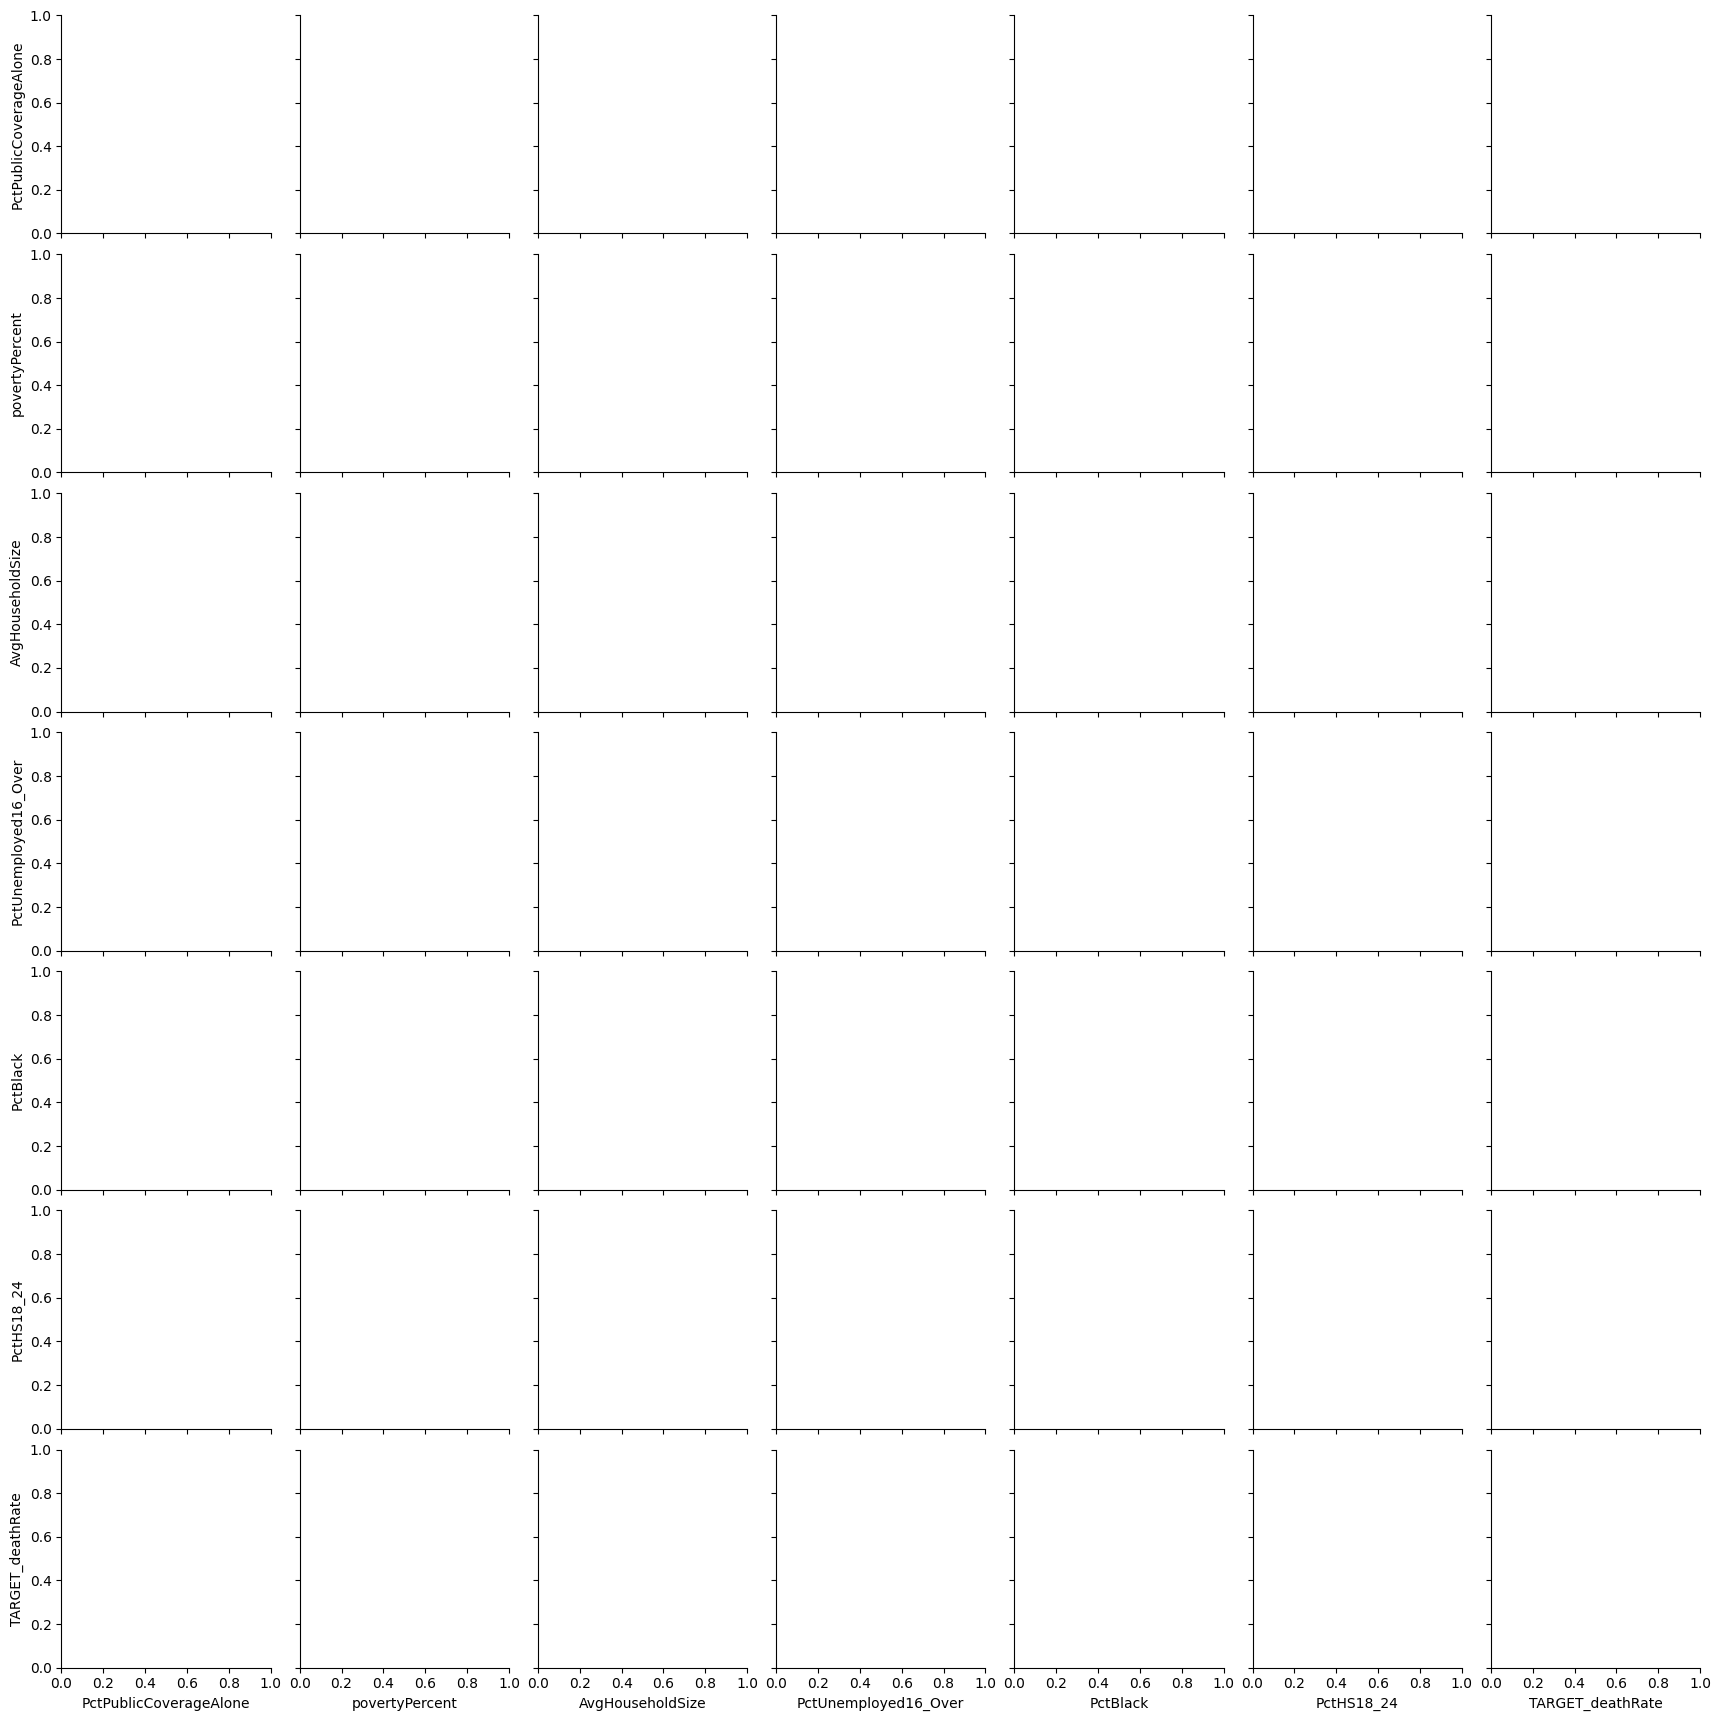

In [71]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming ols_project is your DataFrame
# Replace 'YourDataFrame' with the actual DataFrame name if it's different

# Define the features and target variable
features = ["PctPublicCoverageAlone", "povertyPercent", "AvgHouseholdSize", 
            "PctUnemployed16_Over", "PctBlack", "PctHS18_24"]
target_variable = "TARGET_deathRate"

# Create a new DataFrame with selected features
selected_features_df = df[features + [target_variable]]

# Plot distributions and correlations
sns.pairplot(selected_features_df)
plt.show()

# Add the target variable to the feature list
features.append(target_variable)

# Display summary statistics
summary_statistics = selected_features_df[features].describe()
print(summary_statistics)


## Model 3

* Include State as a features

In [ ]:
df_new = df.copy()
df_new.info()

In [ ]:
target_col = 'TARGET_deathRate'

In [ ]:
import pandas as pd

# Assuming ols_project is your DataFrame
# Replace 'YourDataFrame' with the actual DataFrame name if it's different

df_new[['County/City', 'State']] = df_new['Geography'].str.split(',', expand=True)

# Drop the original 'Geography' column if needed
# ols_project = ols_project.drop('Geography', axis=1)

# Display the modified DataFrame
display(df_new.head(3))

In [ ]:
df_groupbyState = df_new.groupby(['State'])

In [ ]:
df_groupbyState[target_col].describe()

In [ ]:
df_new_ohe = pd.get_dummies(df_new, columns=['State'], prefix='State', dtype=int)

In [ ]:
df_new_ohe.head()

In [ ]:
df_new_ohe.columns

In [ ]:
drop_cols = ['TARGET_deathRate', 'County/City', 'PctSomeCol18_24','PctPrivateCoverageAlone','PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace']
cat_cols = ['binnedInc', 'Geography']
target_col = 'TARGET_deathRate'

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame
columns_to_fill = ['PctSomeCol18_24','PctPrivateCoverageAlone','PctEmployed16_Over']  # Replace with your actual column names

# Fill null values with the mean for each specified column
for column in columns_to_fill:
    mean_value = df_new_ohe[column].mean()
    df_new_ohe[column].fillna(mean_value, inplace=True)

# Now 'df' has null values in the specified columns filled with the mean

In [ ]:
y = df_new_ohe[target_col]
x = df_new_ohe.drop(drop_cols+cat_cols, axis=1)

In [ ]:
import statsmodels.api as sm
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

## Model 4

* Feature selection - Remove highly correlated columns

In [ ]:
df_new_ohe['logPctHS25_Over'] = np.log(df_new_ohe['PctHS25_Over'])
df_new_ohe['logpovertyPercent'] = np.log(df_new_ohe['povertyPercent'])
df_new_ohe['logPercentMarried'] = np.log(df_new_ohe['PercentMarried'])
df_new_ohe['logincidenceRate'] = np.log(df_new_ohe['incidenceRate'])
df_new_ohe['logPctBachDeg25_Over'] = np.log(df_new_ohe['PctBachDeg25_Over'])
df_new_ohe['AvgHouseholdSize_sq'] = np.square(df_new_ohe['AvgHouseholdSize'])
df_new_ohe['MedianAge_sq'] = np.square(df_new_ohe['MedianAge'])
df_new_ohe['BirthRate_sq'] = np.square(df_new_ohe['BirthRate'])

In [ ]:
shantanu_features = ['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate',
       'medIncome', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24',
       'PctHS18_24', 'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']

In [ ]:
for col in shantanu_features:
    df_new_ohe[col+'_sq'] = np.square(df_new_ohe[col])

In [ ]:
shantanu_features_with_sq = ['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate',
       'medIncome', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24',
       'PctHS18_24', 'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate',
       'avgAnnCount_sq', 'avgDeathsPerYear_sq', 'incidenceRate_sq',
       'medIncome_sq', 'povertyPercent_sq', 'studyPerCap_sq', 'MedianAge_sq',
       'MedianAgeMale_sq', 'AvgHouseholdSize_sq', 'PercentMarried_sq',
       'PctNoHS18_24_sq', 'PctHS18_24_sq', 'PctSomeCol18_24_sq',
       'PctBachDeg18_24_sq', 'PctHS25_Over_sq', 'PctBachDeg25_Over_sq',
       'PctEmployed16_Over_sq', 'PctUnemployed16_Over_sq',
       'PctPrivateCoverageAlone_sq', 'PctEmpPrivCoverage_sq', 'PctWhite_sq',
       'PctBlack_sq', 'PctAsian_sq', 'PctOtherRace_sq',
       'PctMarriedHouseholds_sq', 'BirthRate_sq']

state_features = ['State_ Alabama', 'State_ Alaska', 'State_ Arizona',
       'State_ Arkansas', 'State_ California', 'State_ Colorado',
       'State_ Connecticut', 'State_ Delaware', 'State_ District of Columbia',
       'State_ Florida', 'State_ Georgia', 'State_ Hawaii', 'State_ Idaho',
       'State_ Illinois', 'State_ Indiana', 'State_ Iowa', 'State_ Kansas',
       'State_ Kentucky', 'State_ Louisiana', 'State_ Maine',
       'State_ Maryland', 'State_ Massachusetts', 'State_ Michigan',
       'State_ Minnesota', 'State_ Mississippi', 'State_ Missouri',
       'State_ Montana', 'State_ Nebraska', 'State_ Nevada',
       'State_ New Hampshire', 'State_ New Jersey', 'State_ New Mexico',
       'State_ New York', 'State_ North Carolina', 'State_ North Dakota',
       'State_ Ohio', 'State_ Oklahoma', 'State_ Oregon',
       'State_ Pennsylvania', 'State_ Rhode Island', 'State_ South Carolina',
       'State_ South Dakota', 'State_ Tennessee', 'State_ Texas',
       'State_ Utah', 'State_ Vermont', 'State_ Virginia', 'State_ Washington',
       'State_ West Virginia', 'State_ Wisconsin', 'State_ Wyoming']

In [ ]:
feature_cols = shantanu_features_with_sq + state_features

In [ ]:
# feature_cols = ['incidenceRate','PctBachDeg25_Over', 'logPctHS25_Over','povertyPercent'
#                 'PercentMarried','PctPublicCoverageAlone','PctUnemployed16_Over',
#                'State_ Alabama', 'State_ Alaska', 'State_ Arizona',
#        'State_ Arkansas', 'State_ California', 'State_ Colorado',
#        'State_ Connecticut', 'State_ Delaware', 'State_ District of Columbia',
#        'State_ Florida', 'State_ Georgia', 'State_ Hawaii', 'State_ Idaho',
#        'State_ Illinois', 'State_ Indiana', 'State_ Iowa', 'State_ Kansas',
#        'State_ Kentucky', 'State_ Louisiana', 'State_ Maine',
#        'State_ Maryland', 'State_ Massachusetts', 'State_ Michigan',
#        'State_ Minnesota', 'State_ Mississippi', 'State_ Missouri',
#        'State_ Montana', 'State_ Nebraska', 'State_ Nevada',
#        'State_ New Hampshire', 'State_ New Jersey', 'State_ New Mexico',
#        'State_ New York', 'State_ North Carolina', 'State_ North Dakota',
#        'State_ Ohio', 'State_ Oklahoma', 'State_ Oregon',
#        'State_ Pennsylvania', 'State_ Rhode Island', 'State_ South Carolina',
#        'State_ South Dakota', 'State_ Tennessee', 'State_ Texas',
#        'State_ Utah', 'State_ Vermont', 'State_ Virginia', 'State_ Washington',
#        'State_ West Virginia', 'State_ Wisconsin', 'State_ Wyoming']

In [ ]:
df_model4 = df_new_ohe[df_new_ohe['MedianAge']<100]

In [72]:
y = df_model4[target_col]
x = df_model4[feature_cols]

NameError: name 'df_model4' is not defined

In [73]:
x.head()

,const,incidenceRate,PctHS25_Over,PctBachDeg25_Over,PctPublicCoverageAlone
0,1.0,489.8,23.2,19.6,14.0
1,1.0,411.6,26.0,22.7,15.3
2,1.0,349.7,29.0,16.0,21.1
3,1.0,430.4,31.6,9.3,25.0
4,1.0,350.1,33.4,15.0,22.7


In [74]:
import statsmodels.api as sm
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     648.1
Date:                Mon, 29 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:00:07   Log-Likelihood:                -13510.
No. Observations:                3047   AIC:                         2.703e+04
Df Residuals:                    3042   BIC:                         2.706e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     63

In [75]:
model.pvalues[model.pvalues<0.05]

const                      4.426814e-29
incidenceRate             3.777959e-183
PctHS25_Over               1.959764e-06
PctBachDeg25_Over          1.423308e-21
PctPublicCoverageAlone     2.096150e-47
dtype: float64

In [76]:
import re

data = """
incidenceRate            2.873845e-140
PctBachDeg25_Over         1.061377e-12
logPctHS25_Over           4.858507e-04
povertyPercent            2.225481e-15
PercentMarried            1.225926e-02
State_ Alabama            1.395939e-02
State_ Alaska             4.082081e-11
State_ Arizona            1.437961e-02
State_ Arkansas           4.018927e-15
State_ California         8.274307e-03
State_ Colorado           2.558395e-05
State_ Idaho              4.832209e-06
State_ Indiana            1.013368e-06
State_ Iowa               1.188837e-04
State_ Kentucky           3.067282e-16
State_ Louisiana          4.939744e-02
State_ Maryland           4.180895e-02
State_ Michigan           4.464997e-02
State_ Minnesota          4.884255e-04
State_ Mississippi        3.231332e-08
State_ Missouri           1.362148e-09
State_ Montana            2.780702e-03
State_ Nebraska           1.693539e-02
State_ New Mexico         4.198097e-04
State_ New York           5.785021e-06
State_ Ohio               7.039270e-05
State_ Oklahoma           1.517627e-15
State_ Pennsylvania       8.807461e-03
State_ South Carolina     2.410607e-02
State_ South Dakota       3.440190e-02
State_ Tennessee          1.082561e-10
State_ Texas              6.115633e-03
State_ Utah               1.412702e-07
State_ Virginia           5.144065e-11
State_ West Virginia
"""

# Remove numbers using regular expression
result = re.sub(r'\d+\.\d+e[-+]?\d+', '', data)

# Print the result
print(result)



incidenceRate            
PctBachDeg25_Over         
logPctHS25_Over           
povertyPercent            
PercentMarried            
State_ Alabama            
State_ Alaska             
State_ Arizona            
State_ Arkansas           
State_ California         
State_ Colorado           
State_ Idaho              
State_ Indiana            
State_ Iowa               
State_ Kentucky           
State_ Louisiana          
State_ Maryland           
State_ Michigan           
State_ Minnesota          
State_ Mississippi        
State_ Missouri           
State_ Montana            
State_ Nebraska           
State_ New Mexico         
State_ New York           
State_ Ohio               
State_ Oklahoma           
State_ Pennsylvania       
State_ South Carolina     
State_ South Dakota       
State_ Tennessee          
State_ Texas              
State_ Utah               
State_ Virginia           
State_ West Virginia



Model 5

In [77]:
vif_cols=['MedianAgeFemale','PctPublicCoverage','PctPublicCoverageAlone','popEst2015','PctPrivateCoverage','MedianAgeFemale']
x2 = df.drop(vif_cols+cat_cols, axis=1)
import statsmodels.api as sm
x2 = sm.add_constant(x2)
model = sm.OLS(y,x2).fit()
print(model.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [78]:
import pandas as pd

# Assuming 'df' is your DataFrame
columns_to_fill = ['PctSomeCol18_24','PctPrivateCoverageAlone','PctEmployed16_Over']  # Replace with your actual column names

# Fill null values with the mean for each specified column
for column in columns_to_fill:
    mean_value = df_new_ohe[column].mean()
    df_new_ohe[column].fillna(mean_value, inplace=True)

# Now 'df' has null values in the specified columns filled with the mean

NameError: name 'df_new_ohe' is not defined

## Data Exploration

In [79]:
df_explore = df_new_ohe[(df_new_ohe['MedianAge']<100) & (df_new_ohe['AvgHouseholdSize']>1)]

NameError: name 'df_new_ohe' is not defined

In [80]:
x.columns

Index(['const', 'incidenceRate', 'PctHS25_Over', 'PctBachDeg25_Over',
       'PctPublicCoverageAlone'],
      dtype='object')

In [81]:
import matplotlib.pyplot as plt
x_cols = x[['MedianAge','PercentMarried','PctMarriedHouseholds','PctEmployed16_Over']]

for i in x_cols.columns:
    sns.scatterplot(y=y. x= x[{i}] )




SyntaxError: invalid syntax (4094089209.py, line 5)

In [82]:
import matplotlib.pyplot as plt

x_col = 'medIncome'
y_col = target_col
x = df_explore[x_col]
y = df_explore[y_col]

plt.scatter(x, y, alpha=0.5)
plt.xlabel(x_col)
plt.ylabel(y_col)

NameError: name 'df_explore' is not defined

In [83]:
import matplotlib.pyplot as plt

x_col = 'PercentMarried'
y_col = target_col
x = df_explore[x_col]
y = df_explore[y_col]

plt.scatter(x, y, alpha=0.5)
plt.xlabel(x_col)
plt.ylabel(y_col)

NameError: name 'df_explore' is not defined

In [84]:
df_new_ohe['State_ Other'] = df_new['State'] in other_states

NameError: name 'other_states' is not defined

In [85]:
df_new_ohe.info()

NameError: name 'df_new_ohe' is not defined